In [1]:
import pandas as pd
import numpy as np
import pymongo
import matplotlib.pyplot as plt
from bson.objectid import ObjectId
import temas
from jupyterthemes import jtplot
jtplot.style()

In [2]:
def tema_a_num(tema):
    try:
        return temas.temas_dic[tema.strip().lower()]
    except:
        print("Tema erróneo: %s" % (tema,))
        return None

def temae_a_num(tema, i):
    try:
        return temas.temase_dics[i][tema.strip().lower()]
    except:
        # print("Tema erróneo: %s" % (tema,))
        return None

In [3]:
client = pymongo.MongoClient()
db = client["mediaNet"]
collection = db["posts"]

In [4]:
cod1 = pd.read_excel("experimento/Experimento_Codif_01.xlsx")
cod2 = pd.read_excel("experimento/Experimento_Codif_02.xlsx")

In [5]:
cod1.head()

,id,Texto en FB,Link,Tema General,Tema Específico,Corrección General,Corrección Específica,Unnamed: 7
0,5c241a3926ad31868586c210,Merma en las lluvias hace que nivel del agua d...,https://trib.al/OJeExbg,ciencia y ambiente,ambiente,NaN,NaN,NaN
1,5c24a6f79e07a73612738226,Sern atendidos los fines de semana y en consul...,https://www.crhoy.com/nacionales/adelantaran-c...,política,huelga,asuntos sociales,salud,NaN
2,5c24ad589e07a736127ccc4e,Mandatario de Estados Unidos contact va telefn...,https://trib.al/HGSNxoZ,política,electorales,asuntos internacionales,EEUU,NaN
3,5bbe40665b49ed04284b9252,El accidente se dio esta madrugada,https://www.crhoy.com/nacionales/accidente-mul...,sucesos,accidente,NaN,NaN,NaN
4,5c24a4e79e07a7361270a607,Torre ha logrado enderezarse gracias al trabaj...,https://www.crhoy.com/mundo/celebre-torre-de-p...,asuntos sociales,salud,otros,curiosidades,NaN


In [6]:
cod2.head()

,id,Texto en FB,Link,Tema General,Tema Específico,Corrección General,Corrección Específica
1,5c241a3926ad31868586c210,Merma en las lluvias hace que nivel del agua d...,https://trib.al/OJeExbg,ciencia y ambiente,ambiente,NaN,NaN
2,5c24a6f79e07a73612738226,Sern atendidos los fines de semana y en consul...,https://www.crhoy.com/nacionales/adelantaran-c...,política,huelga,Asuntos sociales,Salud
3,5c24ad589e07a736127ccc4e,Mandatario de Estados Unidos contact va telefn...,https://trib.al/HGSNxoZ,política,electorales,Asuntos internacionales,Estados Unidos
4,5bbe40665b49ed04284b9252,El accidente se dio esta madrugada,https://www.crhoy.com/nacionales/accidente-mul...,sucesos,accidente,NaN,NaN
5,5c24a4e79e07a7361270a607,Torre ha logrado enderezarse gracias al trabaj...,https://www.crhoy.com/mundo/celebre-torre-de-p...,asuntos sociales,salud,Otros,Curiosidades


# Resultados de la primera evaluación

In [37]:
print("\tCantidad de error global: ", sum(~cod1["Corrección General"].isna() | ~cod1["Corrección Específica"].isna()))
print("\tCantidad total: ", len(cod1))
print("\tTasa de errores: %.02f" % (sum(~cod1["Corrección General"].isna() | ~cod1["Corrección Específica"].isna())/len(cod1)))

	Cantidad de error global:  171
	Cantidad total:  400
	Tasa de errores: 0.43


In [7]:
print("\tCantidad de errores: ", sum(~cod1["Corrección General"].isna()))
print("\tCantidad total: ", len(cod1))
print("\tTasa de errores: %.02f" % (sum(~cod1["Corrección General"].isna())/len(cod1)))

	Cantidad de errores:  110
	Cantidad total:  400
	Tasa de errores: 0.28


In [8]:
lod = []
for id in cod1["id"]:
    doc = collection.find_one({"_id": ObjectId(id)})
    ac = doc["autoclassification"]
    lod.append({"id": id, "gp": ac["general_proba"][ac["general_prediction"]], "sp": ac["specific_proba"][ac["specific_prediction"]]})

tbl1 = pd.DataFrame(lod)
tbl1.head()

,gp,id,sp
0,0.981696,5c241a3926ad31868586c210,0.444283
1,0.323443,5c24a6f79e07a73612738226,0.699020
2,0.724155,5c24ad589e07a736127ccc4e,0.399651
3,0.997149,5bbe40665b49ed04284b9252,0.775587
4,0.088606,5c24a4e79e07a7361270a607,0.316029


In [9]:
cod11 = pd.merge(cod1, tbl1, on="id")
cod11.head()

,id,Texto en FB,Link,Tema General,Tema Específico,Corrección General,Corrección Específica,Unnamed: 7,gp,sp
0,5c241a3926ad31868586c210,Merma en las lluvias hace que nivel del agua d...,https://trib.al/OJeExbg,ciencia y ambiente,ambiente,NaN,NaN,NaN,0.981696,0.444283
1,5c24a6f79e07a73612738226,Sern atendidos los fines de semana y en consul...,https://www.crhoy.com/nacionales/adelantaran-c...,política,huelga,asuntos sociales,salud,NaN,0.323443,0.699020
2,5c24ad589e07a736127ccc4e,Mandatario de Estados Unidos contact va telefn...,https://trib.al/HGSNxoZ,política,electorales,asuntos internacionales,EEUU,NaN,0.724155,0.399651
3,5bbe40665b49ed04284b9252,El accidente se dio esta madrugada,https://www.crhoy.com/nacionales/accidente-mul...,sucesos,accidente,NaN,NaN,NaN,0.997149,0.775587
4,5c24a4e79e07a7361270a607,Torre ha logrado enderezarse gracias al trabaj...,https://www.crhoy.com/mundo/celebre-torre-de-p...,asuntos sociales,salud,otros,curiosidades,NaN,0.088606,0.316029


In [10]:
total = sum(cod11["gp"] > 0.7)
acertados = sum((cod11["gp"] > 0.7) & (cod11["Corrección General"].isna()))

print("Cantidad sobre el umbral: ", total)
print("Acertados sobre el umbral: ", acertados)
print("Precisión: %.02f" % (acertados/total))

Cantidad sobre el umbral:  249
Acertados sobre el umbral:  225
Precisión: 0.90


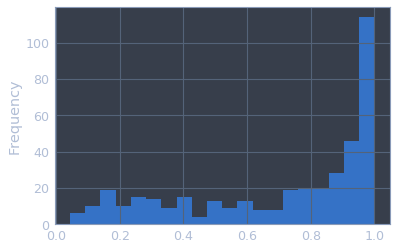

In [11]:
cod11["gp"].plot.hist(bins=20)
plt.show()

In [45]:
pdf = cod11[["gp"]].copy()
pdf["type"] = cod11["Corrección Específica"].fillna(cod11["Tema Específico"]) == cod11["Tema Específico"]
pdf.head()

,gp,type
0,0.981696,True
1,0.323443,False
2,0.724155,False
3,0.997149,True
4,0.088606,False


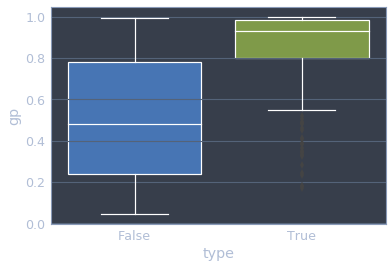

In [46]:
fig, ax = plt.subplots()
sns.boxplot(x='type', y='gp', data=pdf)
for line in ax.lines:
    line.set_color("w")
for artist in ax.artists:
    artist.set_edgecolor("w")
plt.show()

In [12]:
correcto = cod1["Corrección General"].fillna(cod1["Tema General"]).apply(tema_a_num)
predecido = cod1["Tema General"].apply(tema_a_num)
correcto.head()

0    5
1    9
2    6
3    0
4    7
Name: Corrección General, dtype: int64

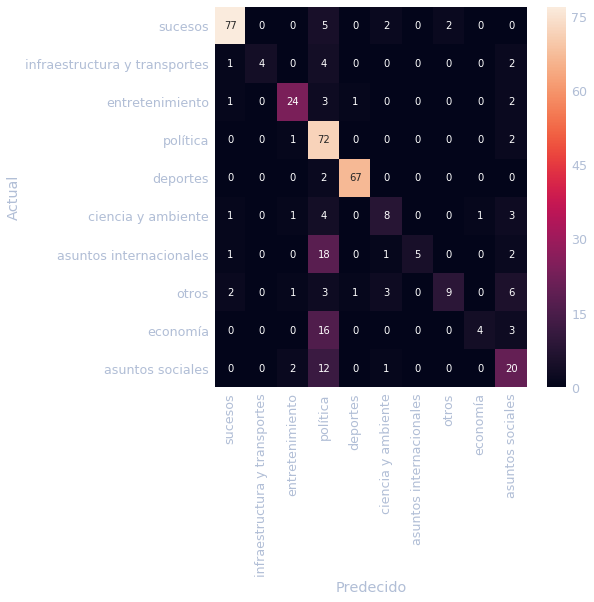

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(correcto, predecido)
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=temas.TEMASG, yticklabels=temas.TEMASG)
plt.ylabel('Actual')
plt.xlabel('Predecido')
plt.show()

In [14]:
print("\tCantidad de errores: ", sum(~cod1["Corrección Específica"].isna()))
print("\tCantidad total: ", len(cod1))
print("\tTasa de errores: %.02f" % (sum(~cod1["Corrección Específica"].isna())/len(cod1)))

	Cantidad de errores:  170
	Cantidad total:  400
	Tasa de errores: 0.42


In [15]:
dflist = []
for i in range(10):
    dflist.append({"Tema": temas.TEMASG[i],
                   "Total": sum(correcto == i),
                   "Correctos": sum((correcto == i) & (correcto == predecido)),
                   "Tasa Correctos": sum((correcto == i) & (correcto == predecido))/sum(correcto == i)
                  })
    
df = pd.DataFrame(dflist)[["Tema", "Total", "Correctos", "Tasa Correctos"]]
df

,Tema,Total,Correctos,Tasa Correctos
0,sucesos,86,77,0.895349
1,infraestructura y transportes,11,4,0.363636
2,entretenimiento,31,24,0.774194
3,política,75,72,0.960000
4,deportes,69,67,0.971014
5,ciencia y ambiente,18,8,0.444444
6,asuntos internacionales,27,5,0.185185
7,otros,25,9,0.360000
8,economía,23,4,0.173913
9,asuntos sociales,35,20,0.571429


In [16]:
correctodf = cod11[correcto == predecido]
correcto_esp = correctodf["Corrección Específica"].fillna(correctodf["Tema Específico"])
correcto_esp.head()

0     ambiente
3    accidente
5       futbol
6       futbol
7    educacion
Name: Corrección Específica, dtype: object

In [34]:
temags = correctodf["Tema General"].apply(tema_a_num)
dflist = []
for teman in range(10):
    is_correct = (correctodf[temags == teman]["Tema Específico"] == correcto_esp[temags == teman])
    dflist.append({
        "Tema": temas.TEMASG[teman],
        "Cantidad correctos": sum(is_correct),
        "Total": len(is_correct),
        "Tasa": sum(is_correct)/len(is_correct)
    })

pd.DataFrame(dflist)[["Tema", "Cantidad correctos", "Total", "Tasa"]]

,Tema,Cantidad correctos,Total,Tasa
0,sucesos,58,77,0.753247
1,infraestructura y transportes,4,4,1.000000
2,entretenimiento,21,24,0.875000
3,política,48,72,0.666667
4,deportes,60,67,0.895522
5,ciencia y ambiente,7,8,0.875000
6,asuntos internacionales,3,5,0.600000
7,otros,9,9,1.000000
8,economía,3,4,0.750000
9,asuntos sociales,16,20,0.800000
